Bock, R. (2004). MAGIC Gamma Telescope [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C52C8B.

Following tutorial: https://docs.fast.ai/tutorial.tabular.html

Other Docs: 
- https://docs.fast.ai/tabular.core.html#tabularpandas, 
- https://docs.fast.ai/tabular.data.html#tabulardataloaders, 
- https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot, 
- https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html

In [53]:
import os

from fastai.tabular.all import *
import pandas as pd
import numpy as np
PATH = 'magic04.data'
currentDir = os.getcwd() + '/MAGIC Gamma Telescope/'

In [30]:
labels = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df = pd.read_csv(currentDir + 'magic04.data')
df.columns = labels
df

fLength    fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
0       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
1      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
2       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
3       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
4       51.6240   21.1502  2.9085  0.2420  0.1340   50.8761   43.1887   
...         ...       ...     ...     ...     ...       ...       ...   
19014   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19015   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19016   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19017  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19018  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist class  
0       -9.9574   6.3609  205.2610     g  
1      -45.2160  76.9600  256.7880     g  
2       -7.1513  10.4490  116.7370     g  
3       21.8393   4.6480  356.4620     g  
4        9.8145   3.6130  238.0980     g  
...         ...      ...       ...   ...  
19014    2.8766   2.4229  106.8258     h  
19015   -2.9632  86.7975  247.4560     h  
19016   -9.4662  30.2987  256.5166     h  
19017  -63.8389  84.6874  408.3166     h  
19018   31.4755  52.7310  272.3174     h  

[19019 rows x 11 columns]

In [63]:
g_rows = df[df["class"] == 'g']
g_sample = g_rows.sample(frac=0.5, random_state=42)

df = df.drop(g_sample.index)

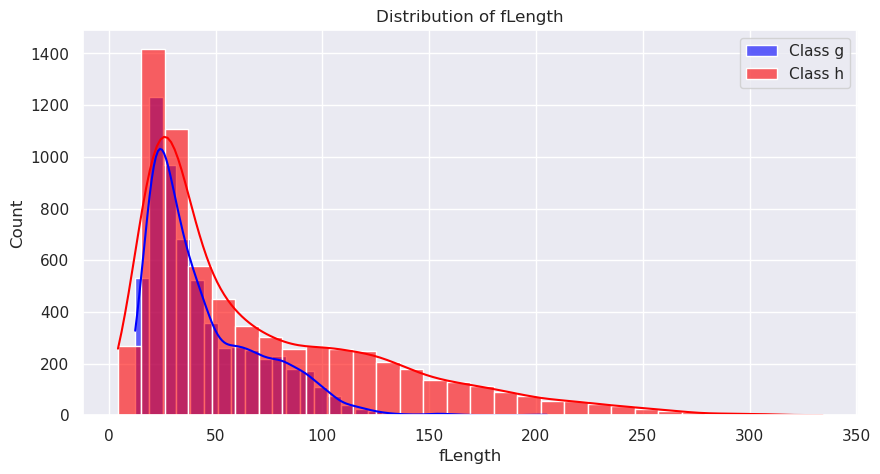

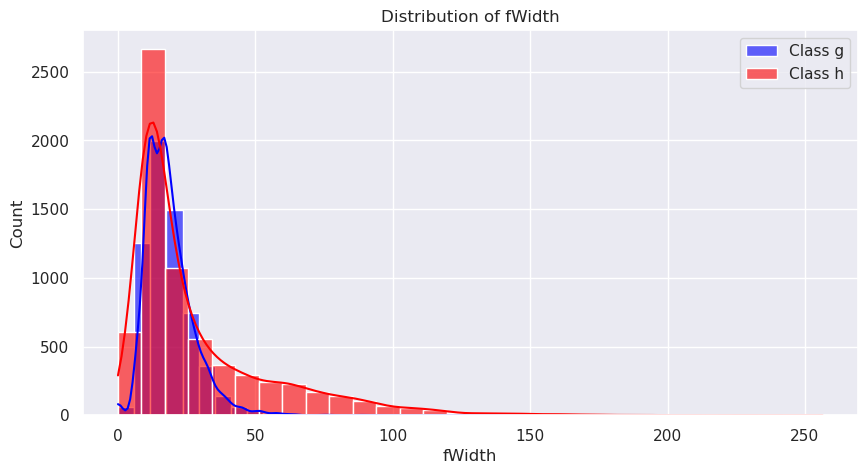

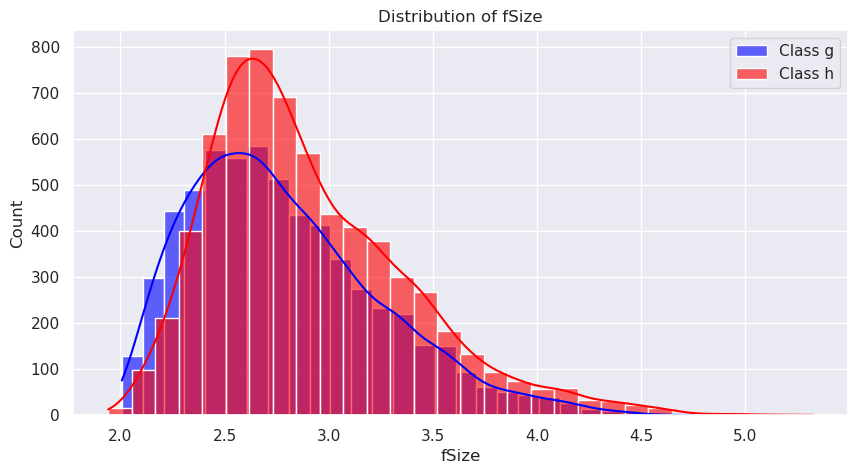

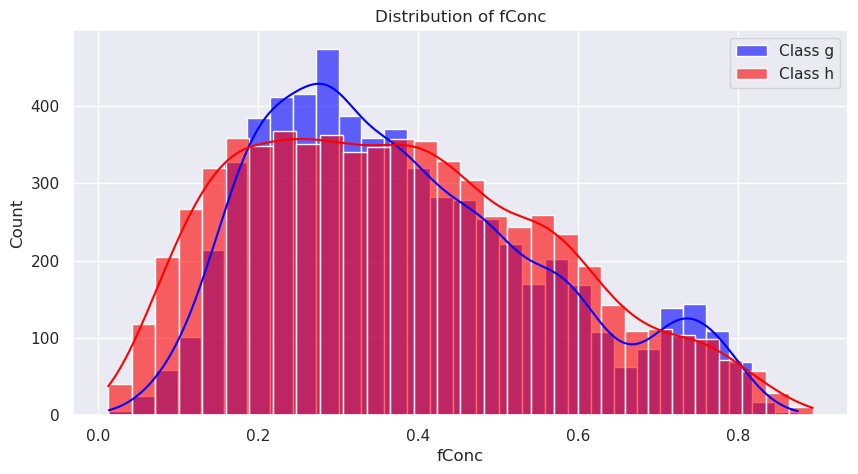

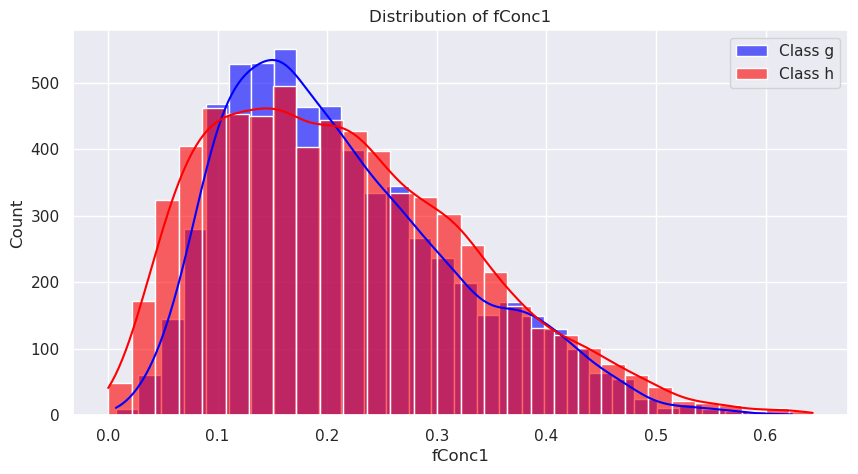

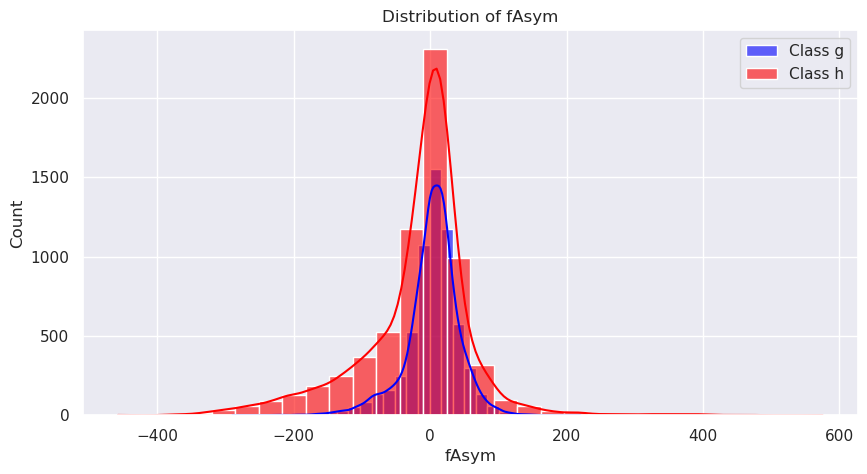

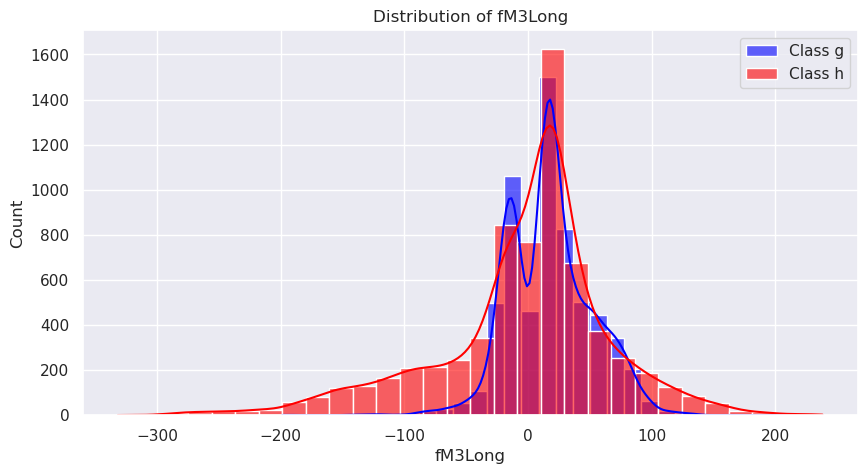

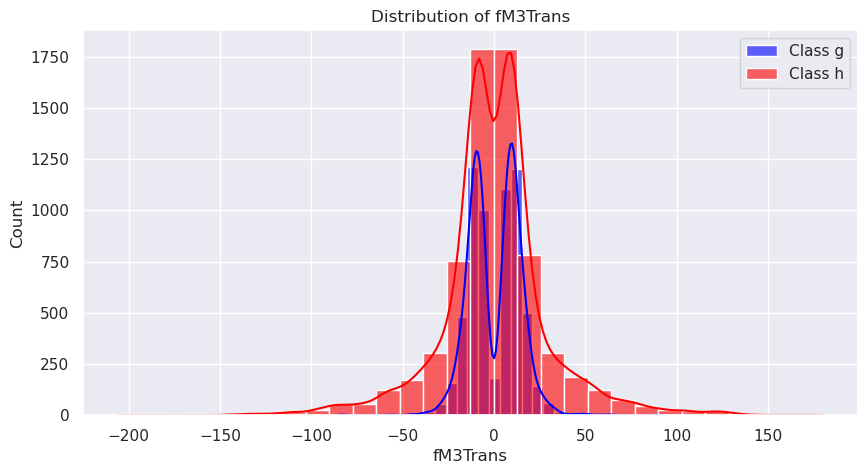

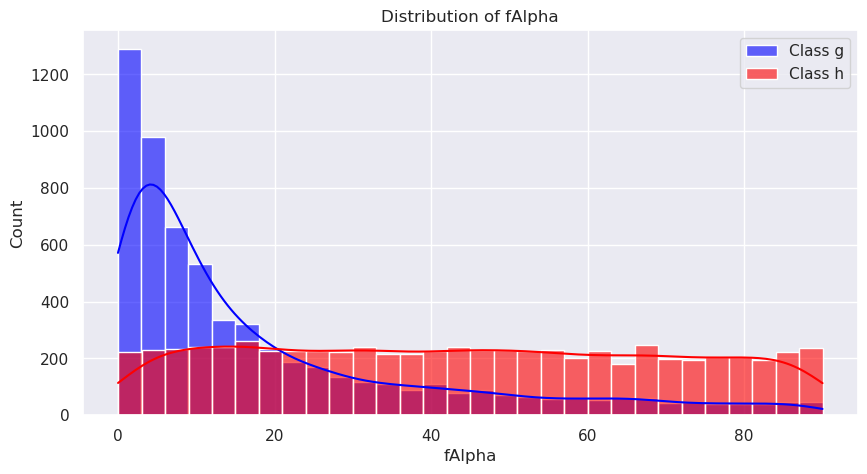

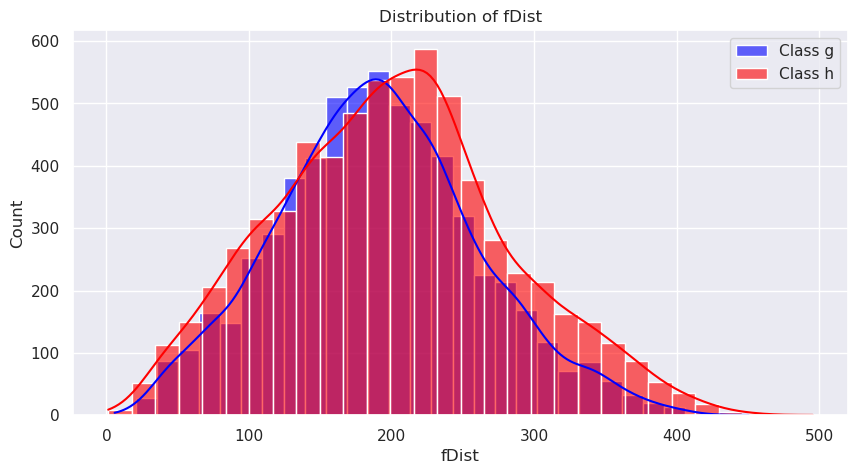

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

features = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 
            'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']

for feature in features:
    dat_g = pd.DataFrame(df.loc[df["class"] == 'g', feature])
    dat_h = pd.DataFrame(df.loc[df["class"] == 'h', feature])
    
    plt.figure(figsize=(10, 5))
    sns.histplot(data=dat_g, x=feature, bins=30, kde=True, color="blue", label="Class g", alpha=0.6)
    sns.histplot(data=dat_h, x=feature, bins=30, kde=True, color="red", label="Class h", alpha=0.6)
    plt.title(f'Distribution of {feature}')
    plt.legend()
    plt.show()


In [69]:
#df = df.drop(['fSize', 'fConc', 'fConc1', 'fDist'], axis=1)
df = df.reset_index()
df

index   fLength    fWidth     fAsym   fM3Long  fM3Trans   fAlpha class
0          1  162.0520  136.0310  116.7410  -64.8580  -45.2160  76.9600     g
1          2   23.8172    9.5728   27.2107   -6.4633   -7.1513  10.4490     g
2          4   51.6240   21.1502   50.8761   43.1887    9.8145   3.6130     g
3          5   48.2468   17.3565    8.5730   38.0957   10.5868   4.7920     g
4          6   26.7897   13.7595   29.6339   20.4560   -2.9292   0.8120     g
...      ...       ...       ...       ...       ...       ...      ...   ...
12848  19014   21.3846   10.9170   15.2618   11.5245    2.8766   2.4229     h
12849  19015   28.9452    6.7020   37.0816   13.1853   -2.9632  86.7975     h
12850  19016   75.4455   47.5305   -9.3561   41.0562   -9.4662  30.2987     h
12851  19017  120.5135   76.9018    5.8043  -93.5224  -63.8389  84.6874     h
12852  19018  187.1814   53.0014 -167.3125 -168.4558   31.4755  52.7310     h

[12853 rows x 8 columns]

In [74]:
splits = RandomSplitter(valid_pct=0.2)(range_of(df))

dls = TabularDataLoaders.from_df(df, y_names="class",
    cont_names = ['fLength', 'fWidth', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha'],
    procs = [Normalize])

to = TabularPandas(df, procs=[Normalize],
                   cont_names = ['fLength', 'fWidth', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha'],
                   y_names='class',
                   splits=splits)

In [75]:
to.xs.iloc[:2]

fLength    fWidth     fAsym   fM3Long  fM3Trans    fAlpha
9497  0.375511  1.247168 -0.104265 -1.503041 -1.611526 -1.156889
6247 -0.627586 -0.776272  0.314385 -0.228860 -0.226427  0.559219

In [76]:
dls = to.dataloaders(bs=64)
dls.show_batch()

In [77]:
learn = tabular_learner(dls, metrics=accuracy)
learn.fit_one_cycle(1)
learn.show_results()